In [165]:
# Useful starting lines
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import sys
import matplotlib.pyplot as plt
from implementations import *

# TO REMOVE ONCE IMPLEMENTED
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%load_ext autoreload
%autoreload 2

# Data input and output paths
DATA_TRAIN_PATH = '../data/train.csv' 
DATA_TEST_PATH = '../data/test.csv'
OUTPUT_PATH = 'predictions_out.csv'

# For debugging purpose
np.set_printoptions(threshold= 50)
np.random.seed(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
from proj1_helpers import *
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

In [167]:
print(np.shape(tx),np.shape(y))

(250000, 30) (250000,)


# Dont run the following if files already generated

In [ ]:
#Defining all the inference functions

def infer_ridge(tX, col):

    # Regression parameters
    lambda_ = 0.000001
    degree = 13
    
    # Get all rows where DER_Mass_MMC is undefined and respectively defined
    train = tX[~np.isnan(tX[:, col]), :]
    test = tX[np.isnan(tX[:, col]), :]  
     
    # Create the training and testing sets
    tx_0_train = np.delete(train, col, axis=1)
    tx_0_train = tx_0_train[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    ty_0_train = train[:, col]
    tx_0_test =  np.delete(test, col, axis=1)
    tx_0_test = tx_0_test[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    
    # Expande the dimension with polynomial
    tx_0_train = build_poly(tx_0_train, degree)
    tx_0_test =build_poly(tx_0_test, degree)
    
    # Train the model
    loss, weights = ridge_regression(ty_0_train, tx_0_train, lambda_)

    # Predict the undefined values
    tx_0_test = np.dot(tx_0_test, weights)
    print(tx_0_test)
    tx_copy=tX
    tx_copy[np.isnan(tX[:, col]), col]  = tx_0_test 
    return tx_copy

def infer_ls(tX,col):
    
    degree = 13
    # Get all rows where DER_Mass_MMC is undefined and respectively defined
    train = tX[~np.isnan(tX[:, col]), :]
    test = tX[np.isnan(tX[:, col]), :]  
     
    # Create the training and testing sets
    tx_0_train = np.delete(train, col, axis=1)
    tx_0_train = tx_0_train[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    ty_0_train = train[:, col]
    tx_0_test =  np.delete(test, col, axis=1)
    tx_0_test = tx_0_test[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    
    # Expande the dimension with polynomial
    tx_0_train = build_poly(tx_0_train, degree)
    tx_0_test =build_poly(tx_0_test, degree)
    
    #parameters
    w0=np.zeros(np.shape(tx_0_train)[1])
    max_i=1000
    gamma = 10e-8
    batch=5
    
    # Train the model
    loss, weights = least_squares_SGD(ty_0_train, tx_0_train, w0, max_i, gamma, batch)
    print("weights after LS: ")
    print(weights)
    # Predict the undefined values
    tx_0_test = np.dot(tx_0_test, weights)
    print(tx_0_test)
    tx_copy=tX
    tx_copy[np.isnan(tX[:, col]), col]  = tx_0_test 
    return tx_copy

def infer_lr(tX,col):
    
    degree = 13
    # Get all rows where DER_Mass_MMC is undefined and respectively defined
    train = tX[~np.isnan(tX[:, col]), :]
    test = tX[np.isnan(tX[:, col]), :]  
     
    # Create the training and testing sets
    tx_0_train = np.delete(train, col, axis=1)
    tx_0_train = tx_0_train[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    ty_0_train = train[:, col]
    tx_0_test =  np.delete(test, col, axis=1)
    tx_0_test = tx_0_test[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    
    # Expande the dimension with polynomial
    tx_0_train = build_poly(tx_0_train, degree)
    tx_0_test =build_poly(tx_0_test, degree)
    
    #parameters
    w0=np.zeros(np.shape(tx_0_train)[1])
    max_i=1000
    gamma = 10e-8
    
    # Train the model
    loss, weights = logistic_regression(ty_0_train, tx_0_train, w0, max_i, gamma)
    print("weights after LR: ")
    print(weights)
    # Predict the undefined values
    tx_0_test = np.dot(tx_0_test, weights)
    print(tx_0_test)
    tx_copy=tX
    tx_copy[np.isnan(tX[:, col]), col]  = tx_0_test 
    return tx_copy

def infer_rlr(tX,col):
    
    degree = 13
    # Get all rows where DER_Mass_MMC is undefined and respectively defined
    train = tX[~np.isnan(tX[:, col]), :]
    test = tX[np.isnan(tX[:, col]), :]  
     
    # Create the training and testing sets
    tx_0_train = np.delete(train, col, axis=1)
    tx_0_train = tx_0_train[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    ty_0_train = train[:, col]
    tx_0_test =  np.delete(test, col, axis=1)
    tx_0_test = tx_0_test[:, ~np.isnan(np.delete(tX, col, axis=1)).any(axis=0)]
    
    # Expande the dimension with polynomial
    tx_0_train = build_poly(tx_0_train, degree)
    tx_0_test =build_poly(tx_0_test, degree)
    
    #parameters
    w0=np.zeros(np.shape(tx_0_train)[1])
    max_i=1000
    gamma = 10e-8
    lambda_ = 0.0001
    
    # Train the model
    loss, weights = reg_logistic_regression(ty_0_train, tx_0_train, lambda_, w0, max_i, gamma)
    print("weights after RLR: ")
    print(weights)
    # Predict the undefined values
    tx_0_test = np.dot(tx_0_test, weights)
    print(tx_0_test)
    tx_copy=tX
    tx_copy[np.isnan(tX[:, col]), col]  = tx_0_test 
    return tx_copy

def outliers_iqr(tX, whos = 2.5):   
    for i, column in enumerate(tX.T):
        # Compute lower and upper bounds depending on the 1st and 3st quartile
        quartile_1, quartile_3 = np.nanpercentile(column, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * whos)
        upper_bound = quartile_3 + (iqr * whos)
        
        # Increase small outliers
        indices = np.where(column < lower_bound)
        tX[indices, i] = lower_bound
        
        # Decrease big outliers
        indices = np.where(column > upper_bound)
        tX[indices, i] = upper_bound
        
    return tX

def pri_jet_split(y, tX, ids):
    # Get the rows' indexes of each category
    indices_cat_0 = np.argwhere(tX[:, 22] == 0).flatten()
    indices_cat_1 = np.argwhere(tX[:, 22] == 1).flatten()
    indices_cat_2 = np.argwhere(tX[:, 22] == 2).flatten()
    indices_cat_3 = np.argwhere(tX[:, 22] == 3).flatten()

    # Split the dataset in 4
    tXC = [tX[indices_cat_0, :], tX[indices_cat_1, :], tX[indices_cat_2, :], tX[indices_cat_3, :]]
    idsC = [ids[indices_cat_0], ids[indices_cat_1], ids[indices_cat_2], ids[indices_cat_3]]
    yC = [y[indices_cat_0], y[indices_cat_1], y[indices_cat_2], y[indices_cat_3]]
    
    # Delete undefined features for each category, cf. features description : http://opendata.cern.ch/record/328
    # And the PRI_jet_num feature which is constant now
    tXC[0] = np.delete(tXC[0], (4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29), 1)
    tXC[1] = np.delete(tXC[1], (4, 5, 6, 12, 22, 26, 27, 28), 1)
    tXC[2] = np.delete(tXC[2], (22), 1)
    tXC[3] = np.delete(tXC[3], (22), 1)
    
    return yC, tXC, idsC

In [ ]:
def prepare_data(y,ids,tx,degree):

    #replacing unknown values with nan
    tx[tx==-999]=np.nan
    
    # Cap our outliers records.
    tx = outliers_iqr(tx, 2.5)
    
    #splitting the data in each cat
    y_split, tx_split, ids_split = pri_jet_split(y, tx, ids)
    
    tx_ridge=tx_split
    tx_ls=tx_split
    tx_lr=tx_split
    tx_rlr=tx_split
    for i in range(len(tx_split)):
        # Standardize the data
        tx_ridge[i], _, _ = standardize(tx_ridge[i])
        tx_ls[i], _, _ = standardize(tx_ls[i])
        tx_lr[i], _, _ = standardize(tx_lr[i])
        tx_rlr[i], _, _ = standardize(tx_rlr[i])
        # Infere missing values on each column (normally just DER_Mass_MMC)     
        colsWithNan = np.unique(np.where(np.isnan(tx_split[i]))[1])
        for col in colsWithNan:
            tx_ridge[i]=infer_ridge(tx_ridge[i], col)
            tx_ls[i]=infer_ls(tx_ls[i], col)
            tx_lr[i]=infer_lr(tx_lr[i], col)
            tx_rlr[i]=infer_rlr(tx_rlr[i], col)

        
        print("cat "+str(i)+" done")

    return y_split,ids_split,tx_ridge,tx_ls,tx_lr,tx_rlr


In [204]:
yc,idc,tx_ridge,tx_ls,tx_lr,tx_rlr=prepare_data(y,ids,tx,13)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in less
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in greater


[-0.39266234 -2.04872282 -0.89335957 ... -1.92193614 -1.07551588
 -1.03140784]
weights after LS: 
[nan nan nan ... nan nan nan]
[]
weights after LR: 
[-3.18489363e-08  8.37188028e-10  4.11368410e-08 ... -9.77699020e-02
 -2.55018898e-07  1.46029384e+02]
[]
Current iteration=0, loss=69254.41425128581
weights after RLR: 
[-3.18489363e-08  8.37188028e-10  4.11368410e-08 ... -9.77699020e-02
 -2.55018898e-07  1.46029384e+02]
[]
cat 0 done
[ 2.05764113 -1.30989152 -1.23492643 ...  2.23928217  2.59839339
 -0.08410579]
weights after LS: 
[nan nan nan ... nan nan nan]
[]


KeyboardInterrupt: 

In [171]:
#Clean data files
ridge_data_file="dumps/clean_ridge"
ls_data_file="dumps/clean_ls"
lr_data_file="dumps/clean_lr"
rlr_data_file="dumps/clean_rlr"
y_data_file="dumps/clean_y"
id_data_file="dumps/clean_ids"

In [172]:
yc=np.asarray(yc)
idc=np.asarray(idc)
tx_ridge=np.asarray(tx_ridge)
tx_ls=np.asarray(tx_ls)
tx_lr=np.asarray(tx_lr)
tx_rlr=np.asarray(tx_rlr)

yc.dump(y_data_file)
tx_ridge.dump(ridge_data_file)
tx_ls.dump(ls_data_file)
tx_lr.dump(lr_data_file)
tx_rlr.dump(rlr_data_file)
idc.dump(id_data_file)

In [173]:
import pickle
yc=np.load(y_data_file,allow_pickle=True)
idc=np.load(id_data_file,allow_pickle=True)
tx_ridge=np.load(ridge_data_file,allow_pickle=True)
tx_ls=np.load(ls_data_file,allow_pickle=True)
tx_lr=np.load(lr_data_file,allow_pickle=True)
tx_rlr=np.load(rlr_data_file,allow_pickle=True)


In [174]:
y_split, tx_split, ids_split = pri_jet_split(y, tx, ids)
np.allclose(tx_ls[1],tx_split[1])

False

In [175]:
from sklearn.metrics import precision_recall_fscore_support as prfs

def ridge_model(tx,y,lambda_,degree):
    
    weights=[]
    precisions=[]
    predictions=[]
    
    for i in range(len(tx)):
        x=build_poly(tx[i], degree)
        
        l,w=ridge_regression(y[i], x, lambda_)
        prediction=predict_labels(w, x)
        p,r,f,s=prfs(y[i],prediction)
        
        weights.append(w)
        precisions.append(p)
        predictions.append(prediction)

    return np.asarray(weights),np.asarray(precisions),np.asarray(predictions)

def ls_model(tx,y,max_i,gamma,degree):
    
    weights=[]
    precisions=[]
    predictions=[]
    
    for i in range(len(tx)):
        x=build_poly(tx[i], degree)
        w0=np.zeros(np.shape(x)[1])
        l,w=least_squares_SGD(y[i], x, w0,max_i,gamma)
        prediction=predict_labels(w, x)
        p,r,f,s=prfs(y[i],prediction)
        
        weights.append(w)
        precisions.append(p)
        predictions.append(prediction)
        
    return np.asarray(weights),np.asarray(precisions),np.asarray(predictions)

def lr_model(tx,y,max_i,gamma,degree):
    
    weights=[]
    precisions=[]
    predictions=[]
    
    for i in range(len(tx)):
        x=build_poly(tx[i], degree)
        w0=np.zeros(np.shape(x)[1])
        l,w=logistic_regression(y[i], x, w0,max_i,gamma)
        prediction=predict_labels(w, x)
        p,r,f,s=prfs(y[i],prediction)
        
        weights.append(w)
        precisions.append(p)
        predictions.append(prediction)
        
    return np.asarray(weights),np.asarray(precisions),np.asarray(predictions)

def rlr_model(tx,y,max_i,gamma,lambda_,degree):
    
    weights=[]
    precisions=[]
    predictions=[]
    
    for i in range(len(tx)):
        x=build_poly(tx[i], degree)
        w0=np.zeros(np.shape(x)[1])
        l,w=reg_logistic_regression(y[i], x,lambda_,w0,max_i,gamma)
        prediction=predict_labels(w, x)
        p,r,f,s=prfs(y[i],prediction)
        
        weights.append(w)
        precisions.append(p)
        predictions.append(prediction)
        
    return np.asarray(weights),np.asarray(precisions),np.asarray(predictions)


In [177]:
degree=13
gamma = 10e-8
lambda_=0.0001
max_i=1000

ridge_precisions=[]
_,pr,_=ridge_model(tx_ridge,yc,lambda_,degree)
ridge_precisions.append(pr)
#_,p,_=ls_model(tx_ridge,yc,max_i,gamma,degree)
ridge_precisions.append(pr)
_,pr,_=lr_model(tx_ridge,yc,max_i,gamma,degree)
ridge_precisions.append(pr)
_,pr,_=rlr_model(tx_ridge,yc,max_i,gamma,lambda_,degree)
ridge_precisions.append(pr)


Current iteration=0, loss=69254.41425128581
Current iteration=0, loss=53749.4049693404
Current iteration=0, loss=34920.061809429484
Current iteration=0, loss=15362.914109930627


In [178]:
ls_precisions=[]
_,pls,_=ridge_model(tx_ls,yc,lambda_,degree)
ls_precisions.append(pls)
#_,p,_=ls_model(tx_ls,yc,max_i,gamma,degree)
ls_precisions.append(pls)
_,pls,_=lr_model(tx_ls,yc,max_i,gamma,degree)
ls_precisions.append(pls)
_,pls,_=rlr_model(tx_ls,yc,max_i,gamma,lambda_,degree)
ls_precisions.append(pls)

Current iteration=0, loss=69254.41425128581
Current iteration=0, loss=53749.4049693404
Current iteration=0, loss=34920.061809429484
Current iteration=0, loss=15362.914109930627


In [179]:
lr_precisions=[]
_,plr,_=ridge_model(tx_lr,yc,lambda_,degree)
lr_precisions.append(plr)
#_,p,_=ls_model(tx_lr,yc,max_i,gamma,degree)
lr_precisions.append(plr)
_,plr,_=lr_model(tx_lr,yc,max_i,gamma,degree)
lr_precisions.append(plr)
_,plr,_=rlr_model(tx_lr,yc,max_i,gamma,lambda_,degree)
lr_precisions.append(plr)

Current iteration=0, loss=69254.41425128581
Current iteration=0, loss=53749.4049693404
Current iteration=0, loss=34920.061809429484
Current iteration=0, loss=15362.914109930627


In [180]:
rlr_precisions=[]
_,prlr,_=ridge_model(tx_rlr,yc,lambda_,degree)
rlr_precisions.append(prlr)
#_,p,_=ls_model(tx_rlr,yc,max_i,gamma,degree)
rlr_precisions.append(prlr)
_,prlr,_=lr_model(tx_rlr,yc,max_i,gamma,degree)
rlr_precisions.append(prlr)
_,prlr,_=rlr_model(tx_rlr,yc,max_i,gamma,lambda_,degree)
rlr_precisions.append(prlr)

Current iteration=0, loss=69254.41425128581
Current iteration=0, loss=53749.4049693404
Current iteration=0, loss=34920.061809429484
Current iteration=0, loss=15362.914109930627


In [181]:
#Creating file dumps with precision data
ridge_precision_file="dumps/r_precision"
ls_precision_file="dumps/ls_precision"
lr_precision_file="dumps/lr_precision"
rlr_precision_file="dumps/rlr_precision"

In [182]:
np.asarray(ridge_precisions).dump(ridge_precision_file)
np.asarray(ls_precisions).dump(ls_precision_file)
np.asarray(lr_precisions).dump(lr_precision_file)
np.asarray(rlr_precisions).dump(rlr_precision_file)

# Run from here for results

In [ ]:
def visualise(tx,title):
    labels=['Ridge regression','Least Square SGD','Logistic regression','Reg log regression']
    x=np.arange(len(labels))
    width=0.1
    fig,ax=plt.subplots(figsize=(20,10))
    
    precision1=ax.bar(x-7*width/2,tx[:,0][:,0],width,label='-1 cat 1')
    precision2=ax.bar(x-5*width/2,tx[:,0][:,1],width,label='1 cat 1')

    precision3=ax.bar(x-3*width/2,tx[:,1][:,0],width,label='-1 cat 2')
    precision4=ax.bar(x-width/2,tx[:,1][:,1],width,label='1 cat 2')

    precision5=ax.bar(x+width/2,tx[:,2][:,0],width,label='-1 cat 3')
    precision6=ax.bar(x+3*width/2,tx[:,2][:,1],width,label='1 cat 3')

    precision7=ax.bar(x+5*width/2,tx[:,3][:,0],width,label='-1 cat 4')
    precision8=ax.bar(x+7*width/2,tx[:,3][:,1],width,label='1 cat 4')

    ax.set_ylabel('Precision')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(precision1)
    autolabel(precision2)
    autolabel(precision3)
    autolabel(precision4)
    autolabel(precision5)
    autolabel(precision6)
    autolabel(precision7)
    autolabel(precision8)
    
    fig.tight_layout()
    plt.show()

In [183]:
import pickle
ridge_precisions=np.load(ridge_precision_file, allow_pickle=True)
ls_precisions=np.load(ls_precision_file, allow_pickle=True)
lr_precisions=np.load(lr_precision_file, allow_pickle=True)
rlr_precisions=np.load(rlr_precision_file, allow_pickle=True)

### Test results

I tried infering the data with the different regression methods in an attempt to higher the precision of our prediction. Then I tried the construct the model with the different methods. (__Note:__ The model could not be built by the Least square model so the values displayed on the graph do not translate reality)

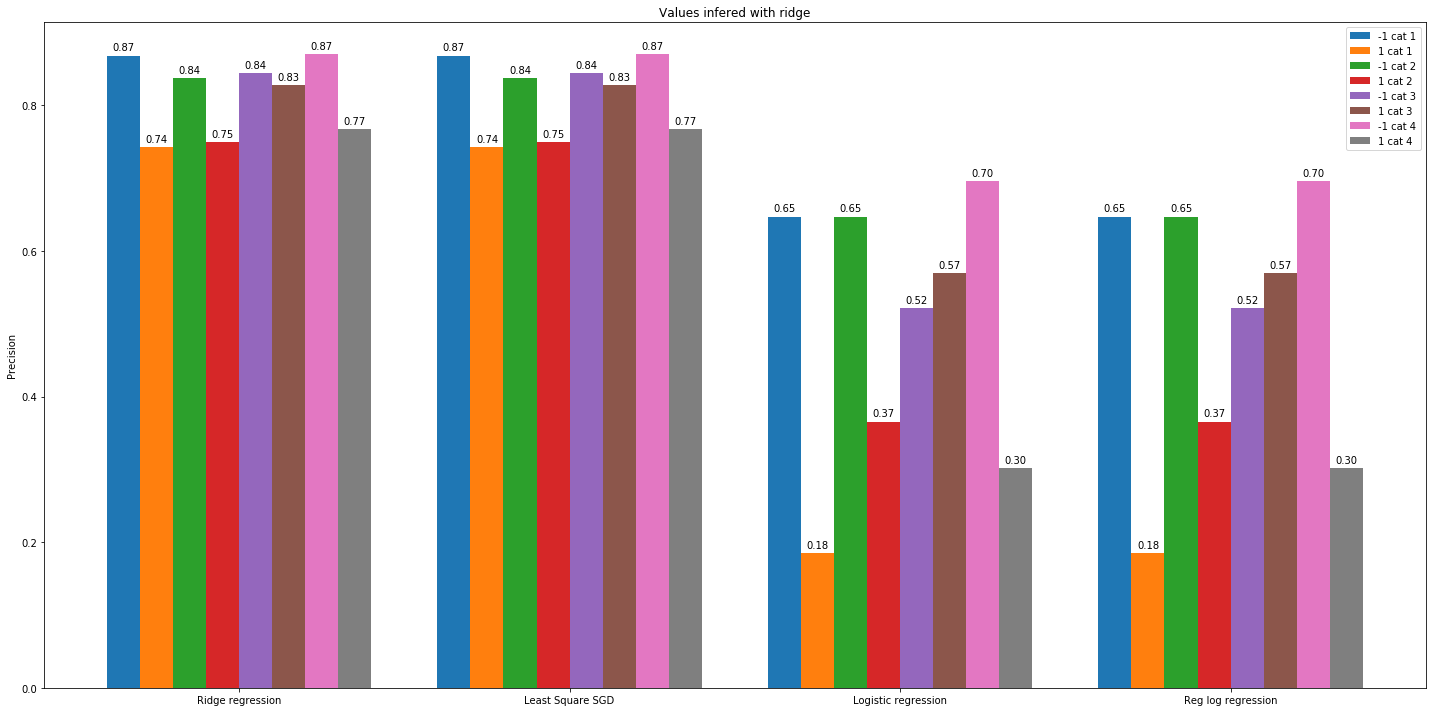

In [184]:
visualise(ridge_precisions,"Values infered with ridge")

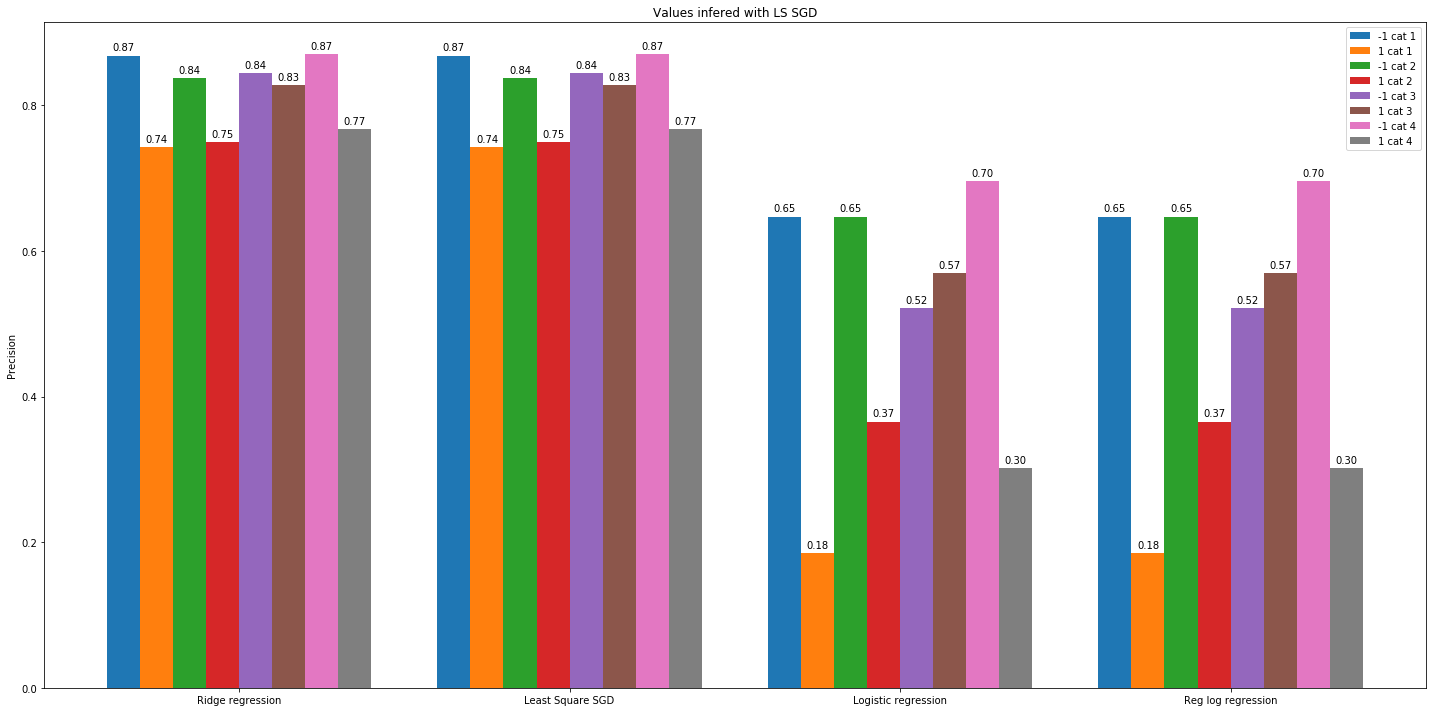

In [185]:
visualise(ls_precisions,"Values infered with LS SGD")

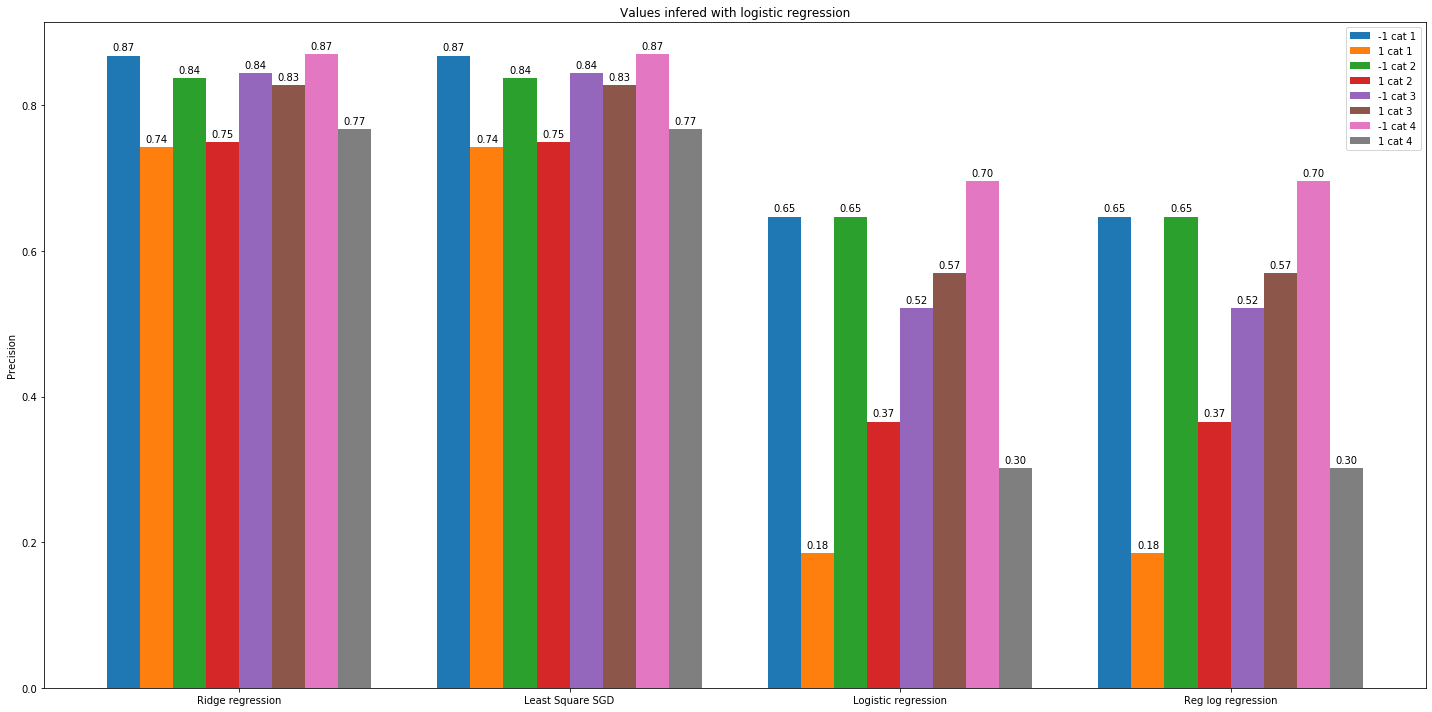

In [186]:
visualise(lr_precisions,"Values infered with logistic regression")

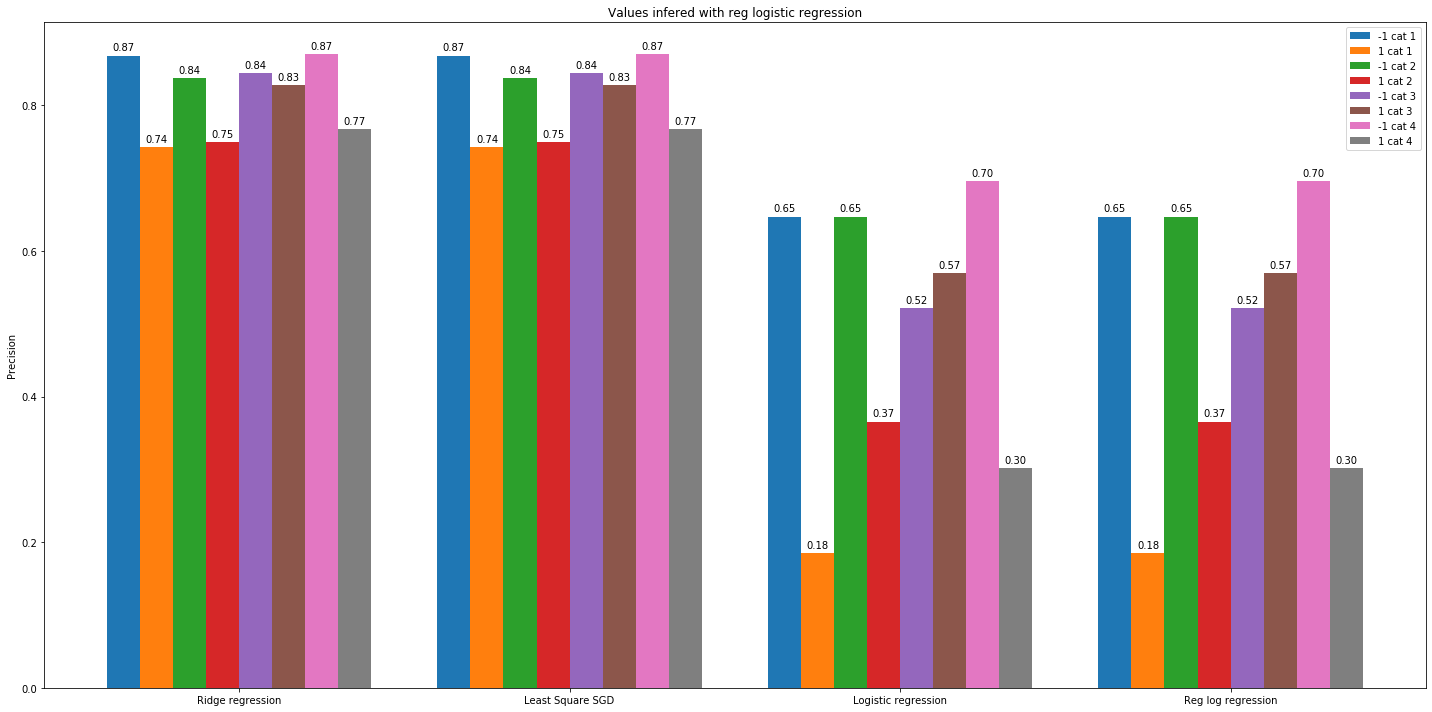

In [187]:
visualise(rlr_precisions,"Values infered with reg logistic regression")

No matter what the inference method is, the Ridge regression always give the best precision. So let's plot only the ridge regression for all the inference method.

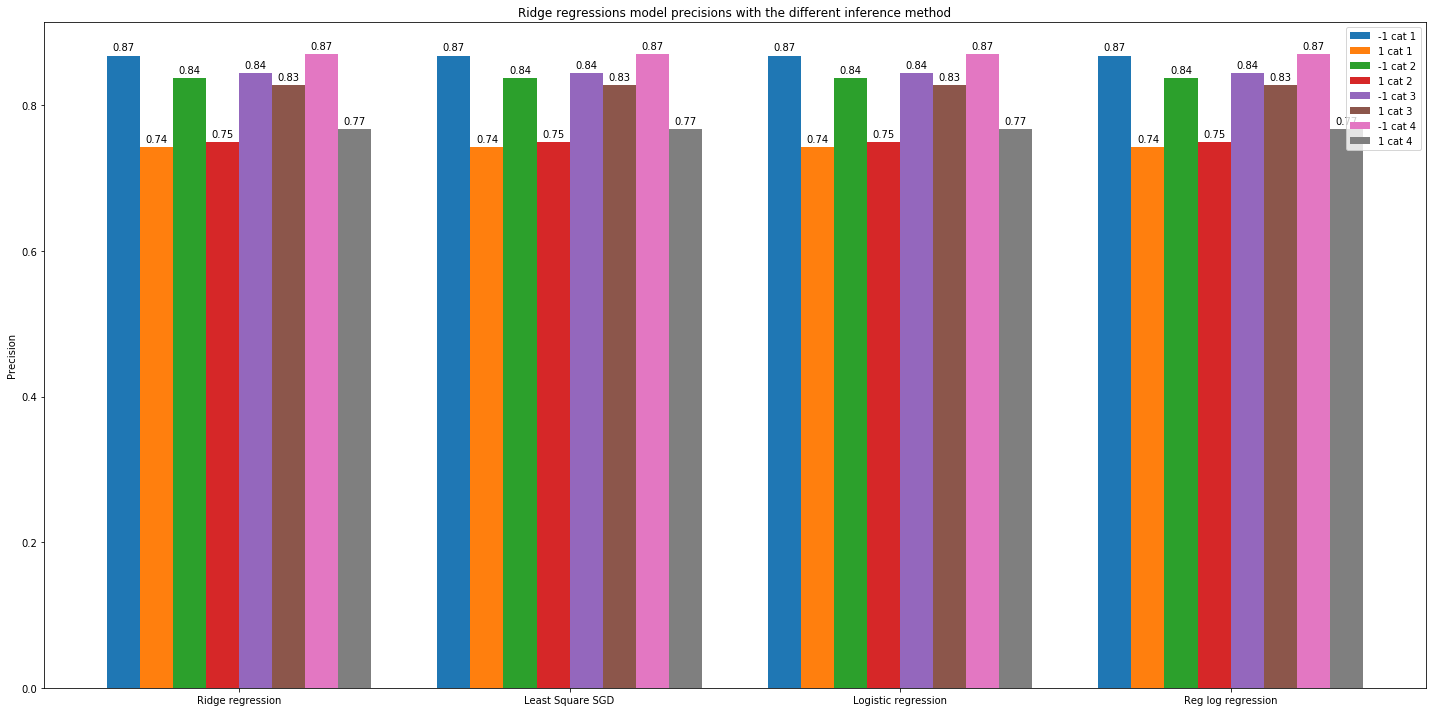

In [188]:
only_ridge=[ridge_precisions[0],ls_precisions[0],lr_precisions[0],rlr_precisions[0]]
visualise(np.asarray(only_ridge),"Ridge regressions model precisions with the different inference method")